In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from code.fasttext.embedding_utils import TableEncoder, compare_embeddings, show_most_similar_rows

In [2]:
stadium_df = pd.read_csv(
    '/home/giovanni/unimore/TESI/src/data/uk_football/List_of_football_stadiums_in_England_1.csv'
)
pl1_df = pd.read_csv(
    '/home/giovanni/unimore/TESI/src/data/uk_football/Premier_League_1.csv'
)

In [3]:
stadium_df.dropna(axis='columns', how='all', inplace=True)
pl1_df.dropna(axis='columns', how='all', inplace=True)

In [4]:
tabenc = TableEncoder()

## Comparing Columns

In [5]:
def round_to(n, precision):
    if n >= 0 or n < 0:
        correction = 0.5 if n >= 0 else -0.5
        return int(n / precision + correction) * precision
    else:
        return n

def round_to_05(n):
    return float(format(round_to(n, 0.05), ".2f"))

In [6]:
mcc = compare_embeddings(stadium_df, pl1_df, tabenc, on='columns',
                            sort_by_cosine_similarity=True,
                            add_label=[False, True],
                            remove_numbers=[False, True],
                            delta=True)

In [7]:
mcc.head()

,C1,C2,cosine similarity,cosine similarity-nonum,delta#1,cosine similarity-wlabel,delta#2,cosine similarity-wlabel-nonum,delta#3
0,Stadium,Stadium,0.974484,0.973984,0.000,0.972607,0.002,0.971808,0.003
1,Capacity,Capacity,0.970957,<NA>,nan,0.970664,0.000,1.0,-0.029
2,Town / City,Location,0.941814,0.941814,0.000,0.940012,0.002,0.940012,0.002
3,Team,Team,0.911942,0.911942,0.000,0.910833,0.001,0.910833,0.001
4,Rank (England only),Capacity,0.87017,<NA>,nan,0.870064,0.000,0.134678,0.735


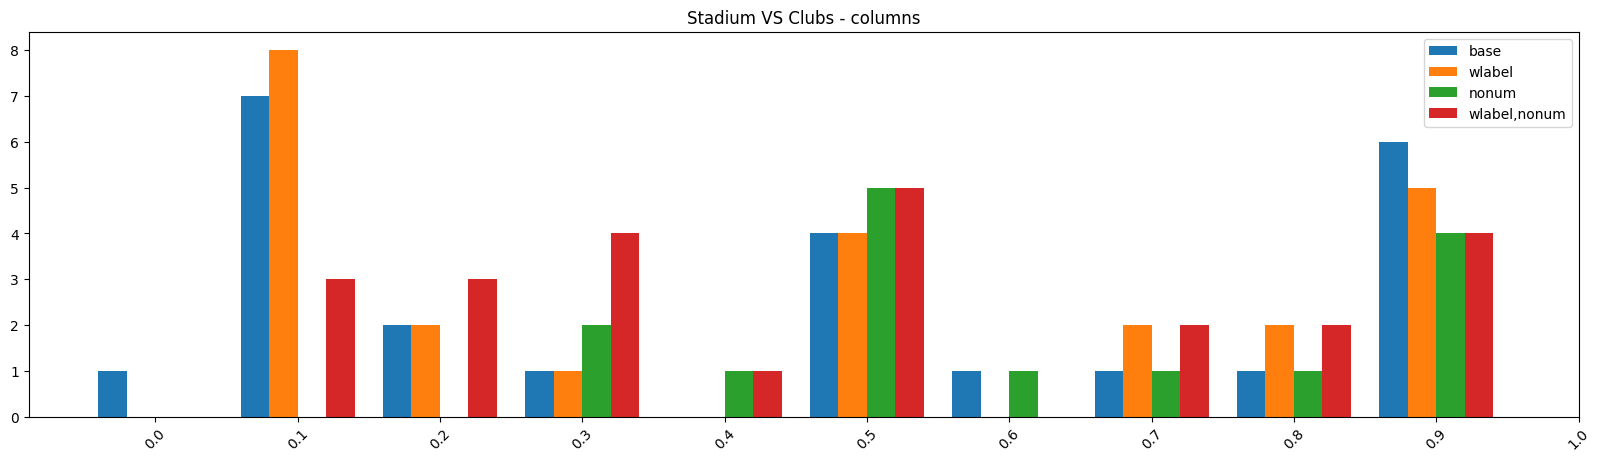

In [8]:
plt.figure(figsize=(20, 5))
prec = 0.1
bins = np.arange(0, 1.01, prec)

plt.hist(
    [
        mcc['cosine similarity'].apply(round_to, args=(prec,)),
        mcc['cosine similarity-wlabel'].apply(round_to, args=(prec,)),
        mcc['cosine similarity-nonum'].apply(round_to, args=(prec,)),
        mcc['cosine similarity-wlabel-nonum'].apply(round_to, args=(prec,))
    ],
    bins=bins,
    label=['base', 'wlabel', 'nonum', 'wlabel,nonum'],
    align='left'
)
plt.xticks(bins, rotation=45)
plt.legend()
plt.title('Stadium VS Clubs - columns')
plt.show()

Some columns disappear from the graph when we exclude numbers in tokenization since they cannot be embedded anymore.

However, in this case it seems that the situation is keep stable among the three variants, except for a general reduction when we exclude numbers.

## Comparing Rows

In [9]:
mrr = compare_embeddings(stadium_df, pl1_df, tabenc, on='rows', 
                   add_label=[False, True],                   
                   remove_numbers=[False, True],
                   delta=True)

In [10]:
mrr

,R1,R2,cosine similarity,cosine similarity-nonum,delta#1,cosine similarity-wlabel,delta#2,cosine similarity-wlabel-nonum,delta#3
0,57,3,0.934452,0.892498,0.042,0.918379,0.016,0.889602,0.045
1,6,12,0.925313,0.913096,0.012,0.913307,0.012,0.900192,0.025
2,23,19,0.92408,0.77207,0.152,0.899194,0.025,0.856911,0.067
3,58,3,0.92218,0.77546,0.147,0.912074,0.010,0.876084,0.046
4,7,14,0.915176,0.953846,-0.039,0.909413,0.006,0.907162,0.008
...,...,...,...,...,...,...,...,...,...
2935,51,17,0.597238,0.590129,0.007,0.748038,-0.151,0.826777,-0.230
2936,117,13,0.593253,0.17384,0.419,0.715742,-0.122,0.668228,-0.075
2937,51,13,0.584544,0.432766,0.152,0.756574,-0.172,0.773939,-0.189
2938,100,18,0.570009,0.326963,0.243,0.730309,-0.160,0.731774,-0.162


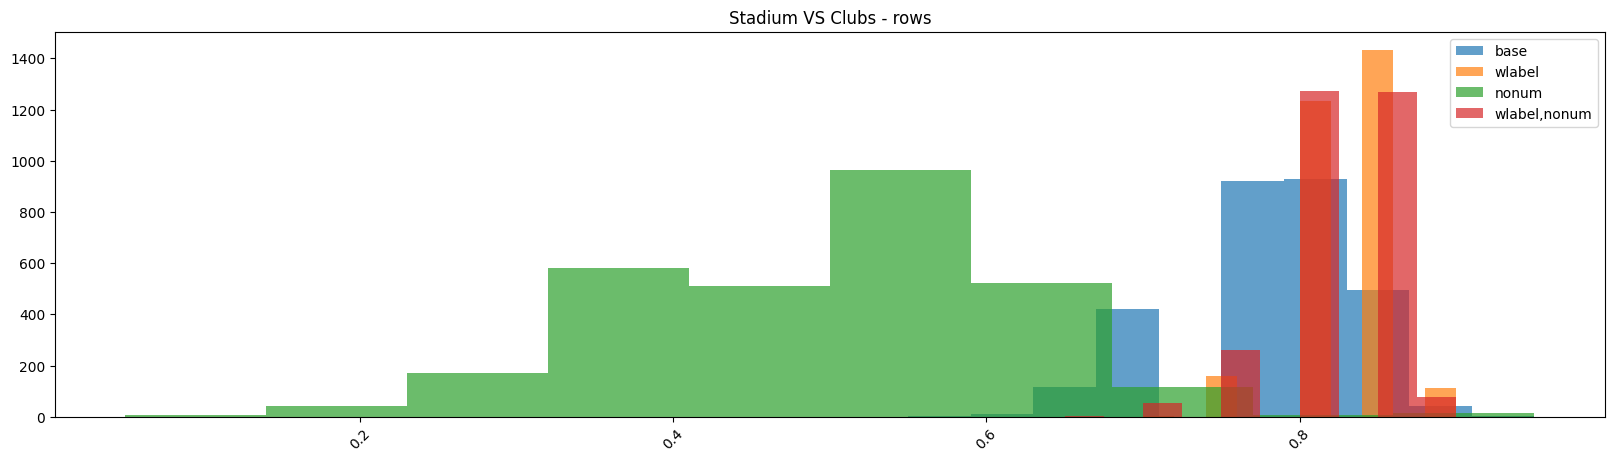

In [11]:
plt.figure(figsize=(20, 5))
prec = 0.05
plt.hist(mrr['cosine similarity'].apply(         round_to, args=(prec,)).values, label='base',   bins=10, alpha=.7)
plt.hist(mrr['cosine similarity-wlabel'].apply(  round_to, args=(prec,)).values, label='wlabel', bins=10, alpha=.7)
plt.hist(mrr['cosine similarity-nonum'].apply(   round_to, args=(prec,)).values, label='nonum',  bins=10, alpha=.7)
plt.hist(mrr['cosine similarity-wlabel-nonum'].apply(round_to, args=(prec,)).values, label='wlabel,nonum',  bins=10, alpha=.7)

plt.xticks(rotation=45)
plt.title('Stadium VS Clubs - rows')
plt.legend()
plt.show()

Here we can see that dropping numbers from embeddings creation maybe reduces "confusion". Could this be helpful in scoring tables similarity or similar tasks?

In [12]:
show_most_similar_rows(mrr[['R1', 'R2', 'cosine similarity']], stadium_df, pl1_df, 10)

#0: 0.9344521592517391
	57: 50.0 Brentford Community Stadium Brentford, London 17,250 Brentford Premier League
	3: Brentford London (Brentford) Gtech Community Stadium 17,250

#1: 0.9253134559337446
	6: 7.0 City of Manchester Stadium Bradford, Manchester 53,400 Manchester City Premier League
	12: Manchester City Manchester (Bradford) Etihad Stadium 53,400

#2: 0.9240801612670546
	23: 22.0 Molineux Wolverhampton 31,750 Wolverhampton Wanderers Premier League
	19: Wolverhampton Wanderers Wolverhampton Molineux Stadium 31,750

#3: 0.9221801295183742
	58: 50.0 Brentford Community Stadium Brentford, London 17,250 London Irish (rugby) Premiership Rugby
	3: Brentford London (Brentford) Gtech Community Stadium 17,250

#4: 0.9151764280204044
	7: 8.0 St James' Park Newcastle upon Tyne 52,257 Newcastle United Premier League
	14: Newcastle United Newcastle upon Tyne St James' Park 52,257

#5: 0.9089268908373154
	3: 4.0 London Stadium Stratford, London 62,500 West Ham United Premier League
	18: West

In [13]:
show_most_similar_rows(mrr[['R1', 'R2', 'cosine similarity-nonum']], stadium_df, pl1_df, 10, False)

#0: 0.95757831064105
	3: 4.0 London Stadium Stratford, London 62,500 West Ham United Premier League
	18: West Ham United London (Stratford) London Stadium 62,500

#1: 0.9538456969603144
	7: 8.0 St James' Park Newcastle upon Tyne 52,257 Newcastle United Premier League
	14: Newcastle United Newcastle upon Tyne St James' Park 52,257

#2: 0.9422470237023344
	25: 24.0 City Ground West Bridgford 30,404 Nottingham Forest Premier League
	15: Nottingham Forest West Bridgford City Ground 30,404

#3: 0.9377619309247218
	50: 44.0 Turf Moor Burnley 21,744 Burnley Premier League
	5: Burnley Burnley Turf Moor 21,944

#4: 0.9363581561292945
	38: 35.0 Selhurst Park Selhurst, London 25,486 Crystal Palace Premier League
	7: Crystal Palace London (Selhurst) Selhurst Park 25,486

#5: 0.934874321987362
	1: 2.0 Old Trafford Old Trafford, Greater Manchester 74,031 Manchester United Premier League
	13: Manchester United Manchester (Old Trafford) Old Trafford 74,031

#6: 0.9315335427636698
	9: 10.0 Villa Park A